In [1]:
import sys
sys.path.insert(0, '..\\..\\frxas.py')

import numpy as np
import h5py
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, minimize, report_fit

from frxas import hdf5_io
from frxas import models
from frxas import visualization

%reload_ext autoreload
%autoreload 2

In [2]:
f1 = hdf5_io.get_all_datasets('July18_frXAS_v2', start_indices = [[4, 2, 2], [4, 6, 0], [1, 2]])
hdf5_io.close_frxas_file('July18_frXAS_v2')

In [3]:
x, data, frequencies, gases = hdf5_io.unpack_data(f1, kind='data_adj')

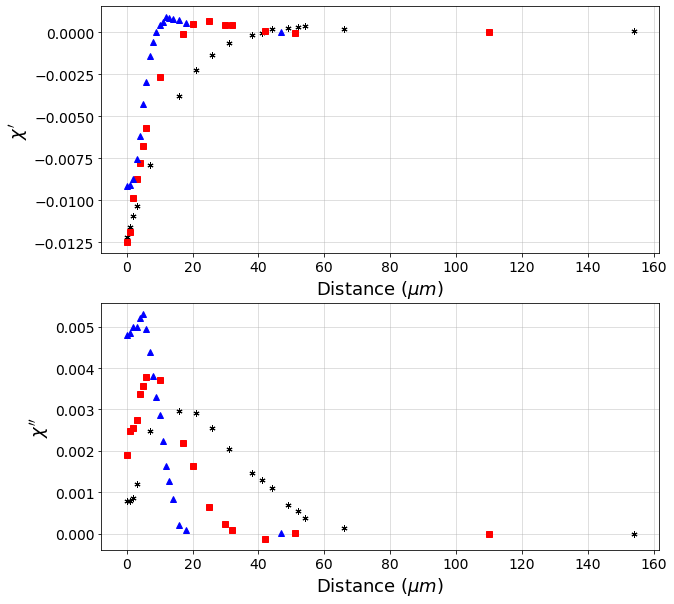

In [5]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

axes = visualization.plot_chi(axes, x[:3], data[:3])
# axes[1].set_xlim((420, 460))
plt.show()

In [6]:
fit_params = Parameters()

for iy, y in enumerate(data):
    fit_params.add('ld_%i' % (iy+1), value=10, min=0.0, max=200)
    fit_params.add('tg_%i' % (iy+1), value=.1, min=0.01, max=100.0)
    fit_params.add('amp_%i' % (iy+1), value=-.002, min=-1, max=0)
    fit_params.add('f_%i' % (iy+1), value=frequencies[iy], vary=False)

In [7]:
for iy in (2, 3):
    fit_params['ld_%i' % iy].expr = 'ld_1'
    fit_params['tg_%i' % iy].expr = 'tg_1'
    fit_params['amp_%i' % iy].expr = 'amp_1'

for iy in (5, 6):
    fit_params['ld_%i' % iy].expr = 'ld_4'
    fit_params['tg_%i' % iy].expr = 'tg_4'
    fit_params['amp_%i' % iy].expr = 'amp_4'


fit_params['ld_8'].expr = 'ld_7'
fit_params['tg_8'].expr = 'tg_7'
fit_params['amp_8'].expr = 'amp_7'

In [8]:
mini=lmfit.Minimizer(models.objective_fun, fit_params, fcn_args=(x, data, models.chi_amp))

In [9]:
out = mini.minimize(method='leastsq')
report_fit(out.params)

[[Variables]]
    ld_1:   27.2122626 +/- 5.07155146 (18.64%) (init = 10)
    tg_1:   1.83222735 +/- 0.67563519 (36.88%) (init = 0.1)
    amp_1: -0.01235476 +/- 2.8160e-04 (2.28%) (init = -0.002)
    f_1:    0.25 (fixed)
    ld_2:   27.2122626 +/- 5.07155146 (18.64%) == 'ld_1'
    tg_2:   1.83222735 +/- 0.67563518 (36.88%) == 'tg_1'
    amp_2: -0.01235476 +/- 2.8160e-04 (2.28%) == 'amp_1'
    f_2:    1 (fixed)
    ld_3:   27.2122626 +/- 5.07155146 (18.64%) == 'ld_1'
    tg_3:   1.83222735 +/- 0.67563518 (36.88%) == 'tg_1'
    amp_3: -0.01235476 +/- 2.8160e-04 (2.28%) == 'amp_1'
    f_3:    4 (fixed)
    ld_4:   16.7512147 +/- 2.36524955 (14.12%) (init = 10)
    tg_4:   1.15164311 +/- 0.32145020 (27.91%) (init = 0.1)
    amp_4: -0.01026273 +/- 3.1672e-04 (3.09%) (init = -0.002)
    f_4:    0.25 (fixed)
    ld_5:   16.7512147 +/- 2.36524955 (14.12%) == 'ld_4'
    tg_5:   1.15164311 +/- 0.32145020 (27.91%) == 'tg_4'
    amp_5: -0.01026273 +/- 3.1672e-04 (3.09%) == 'amp_4'
    f_5:    1 (fi

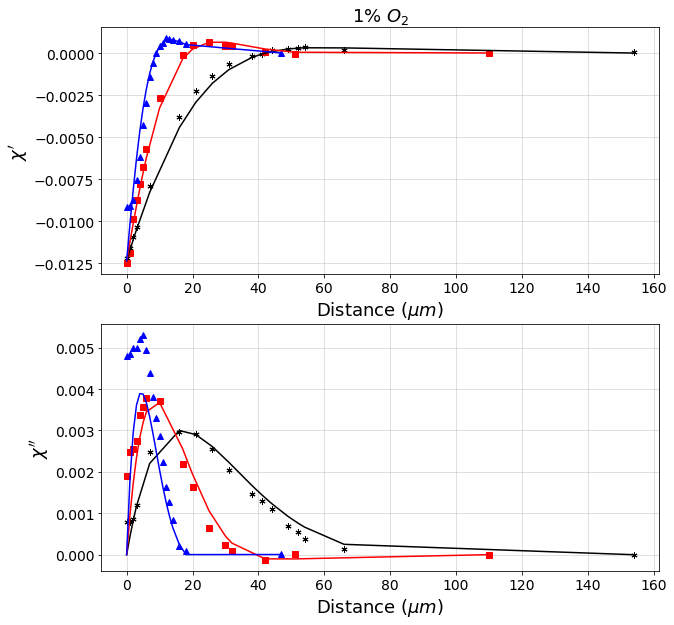

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(0,3):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
for iy in np.arange(0,3):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp), marker='')
    
axes[0].set_title('1% $O_2$', fontsize=18)
plt.show()

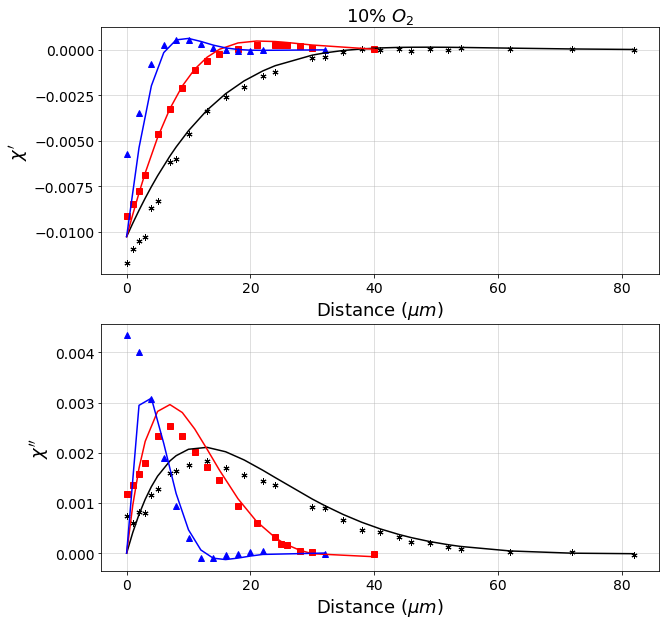

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(3,6):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
for iy in np.arange(3,6):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp), marker='')
    
axes[0].set_title('10% $O_2$', fontsize=18)
plt.show()

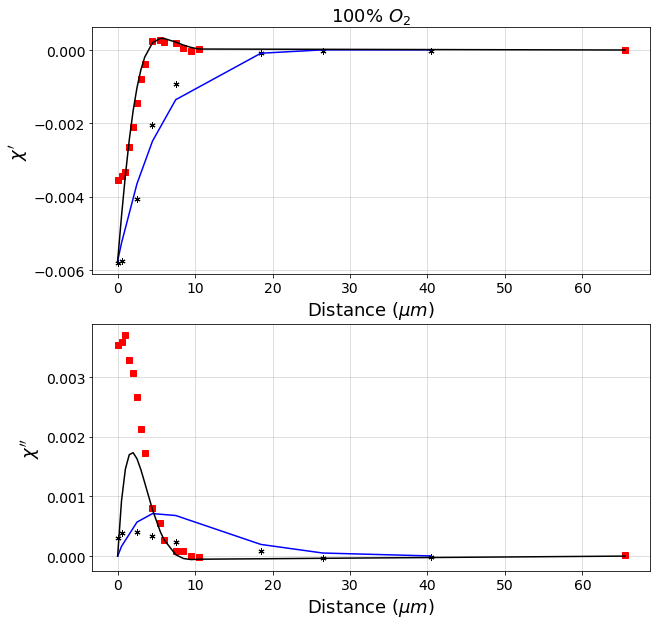

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(6,8):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
for iy in np.arange(6,8):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp), marker='')
    
axes[0].set_title('100% $O_2$', fontsize=18)
plt.show()

Data clearly not fitting to the purely ideal model. Seemingly occurs because the real data isn't scaled to 1 (max values for real components are ~0.002)